In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fifa20 = pd.read_csv('fifa20_data.csv')
fifa20
fifa20.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andr챕s Messi Cuccittini,32,1987.6.24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985.2.5,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992.2.5,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [2]:
fifaDF=pd.DataFrame(fifa20)
fifaDF['team_position']
fifaDF['team_position'].isnull().sum()

240

In [3]:
##공격수 데이터만 보기전, 팀포지션이 빈값으로 되어 있는 데이터를 sub로 바꾸고 지우겟다. 
fifaDF['team_position'].fillna('sub',inplace=True)

In [4]:
##공격수 데이터만 보겠다!!
data_rcm= fifaDF[fifaDF['team_position']=='RCM'].index
fifaDF.drop(data_rcm, axis=0, inplace=True)
data_lcm= fifaDF[fifaDF['team_position']=='LCM'].index
fifaDF.drop(data_lcm, axis=0, inplace=True)
data_cm= fifaDF[fifaDF['team_position']=='CM'].index
fifaDF.drop(data_cm, axis=0, inplace=True)
data_cdm= fifaDF[fifaDF['team_position']=='CDM'].index
fifaDF.drop(data_cdm, axis=0, inplace=True)
data_rdm= fifaDF[fifaDF['team_position']=='RDM'].index
fifaDF.drop(data_rdm, axis=0, inplace=True)
data_ldm= fifaDF[fifaDF['team_position']=='LDM'].index
fifaDF.drop(data_ldm, axis=0, inplace=True)
data_cam= fifaDF[fifaDF['team_position']=='CAM'].index
fifaDF.drop(data_cam, axis=0, inplace=True)
data_lam= fifaDF[fifaDF['team_position']=='LAM'].index
fifaDF.drop(data_lam, axis=0, inplace=True)
data_ram= fifaDF[fifaDF['team_position']=='RAM'].index
fifaDF.drop(data_ram, axis=0, inplace=True)
data_rm= fifaDF[fifaDF['team_position']=='RM'].index
fifaDF.drop(data_rm, axis=0, inplace=True)
data_lm= fifaDF[fifaDF['team_position']=='LM'].index
fifaDF.drop(data_lm, axis=0, inplace=True)
data_cb= fifaDF[fifaDF['team_position']=='CB'].index
fifaDF.drop(data_cb, axis=0, inplace=True)
data_rcb= fifaDF[fifaDF['team_position']=='RCB'].index
fifaDF.drop(data_rcb, axis=0, inplace=True)
data_lcb= fifaDF[fifaDF['team_position']=='LCB'].index
fifaDF.drop(data_lcb, axis=0, inplace=True)
data_rb= fifaDF[fifaDF['team_position']=='RB'].index
fifaDF.drop(data_rb, axis=0, inplace=True)
data_lb= fifaDF[fifaDF['team_position']=='LB'].index
fifaDF.drop(data_lb, axis=0, inplace=True)
data_rwb= fifaDF[fifaDF['team_position']=='RWB'].index
fifaDF.drop(data_rwb, axis=0, inplace=True)
data_lwb= fifaDF[fifaDF['team_position']=='LWB'].index
fifaDF.drop(data_lwb, axis=0, inplace=True)
data_gk= fifaDF[fifaDF['team_position']=='GK'].index
fifaDF.drop(data_gk, axis=0, inplace=True)
data_res= fifaDF[fifaDF['team_position']=='RES'].index
fifaDF.drop(data_res, axis=0, inplace=True)
data_sub= fifaDF[fifaDF['team_position']=='SUB'].index
fifaDF.drop(data_sub, axis=0, inplace=True)

print(fifaDF['team_position'].count())
print(fifaDF['team_position'])
print(fifaDF['team_position'].isnull().sum())

1463
0        RW
1        LW
4        LW
9        RW
10       RW
         ..
17503    RS
17517    LW
17939    RW
17993    ST
18148    ST
Name: team_position, Length: 1463, dtype: object
0


In [7]:
#불필요한 칼럼 제거
def drop_features(df):
    df.drop(['sofifa_id','player_url','short_name','long_name','dob','work_rate','body_type','player_positions','real_face','release_clause_eur','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position','nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits','defending_marking','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb'],axis=1,inplace=True)
    df_value_zero1= df[df['wage_eur']==0].index
    df.drop(df_value_zero1)
    return df

#레이블 인코딩 수행
def format_features(df):
    features = ['nationality','club','team_position','preferred_foot']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=drop_features(df)
    df=format_features(df)
    
    return df

In [8]:
from sklearn import preprocessing
#몸값이 0원인 선수들을 미리 전처리 시킴. 왜 함수에 넣어서 전처리 안했나? --> X_fifa_df=fifa_df.drop('value_eur', axis=1) 이 코드에서 value 열을 빼버리면 value가 없는 선수도 고려를 해야하기 때문.
fifaDF_value_zero= fifaDF[fifaDF['value_eur']==0].index
fifaDF.drop(fifaDF_value_zero, axis=0, inplace=True)
#팀포지션이 정확히 없는 선수의 세부 스탯 지우기.
fifaDF = fifaDF.dropna(subset=['pace'])

#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
fifaDF
Y_fifaDF=fifaDF['value_eur']
X_fifaDF=fifaDF.drop('value_eur', axis=1)
fifaDF=transform_features(fifaDF)

In [9]:
fifaDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 18148
Data columns (total 46 columns):
age                           1223 non-null int64
height_cm                     1223 non-null int64
weight_kg                     1223 non-null int64
nationality                   1223 non-null int64
club                          1223 non-null int64
overall                       1223 non-null int64
potential                     1223 non-null int64
value_eur                     1223 non-null int64
wage_eur                      1223 non-null int64
preferred_foot                1223 non-null int64
international_reputation      1223 non-null int64
weak_foot                     1223 non-null int64
skill_moves                   1223 non-null int64
team_position                 1223 non-null int64
pace                          1223 non-null float64
shooting                      1223 non-null float64
passing                       1223 non-null float64
dribbling                     1223 n

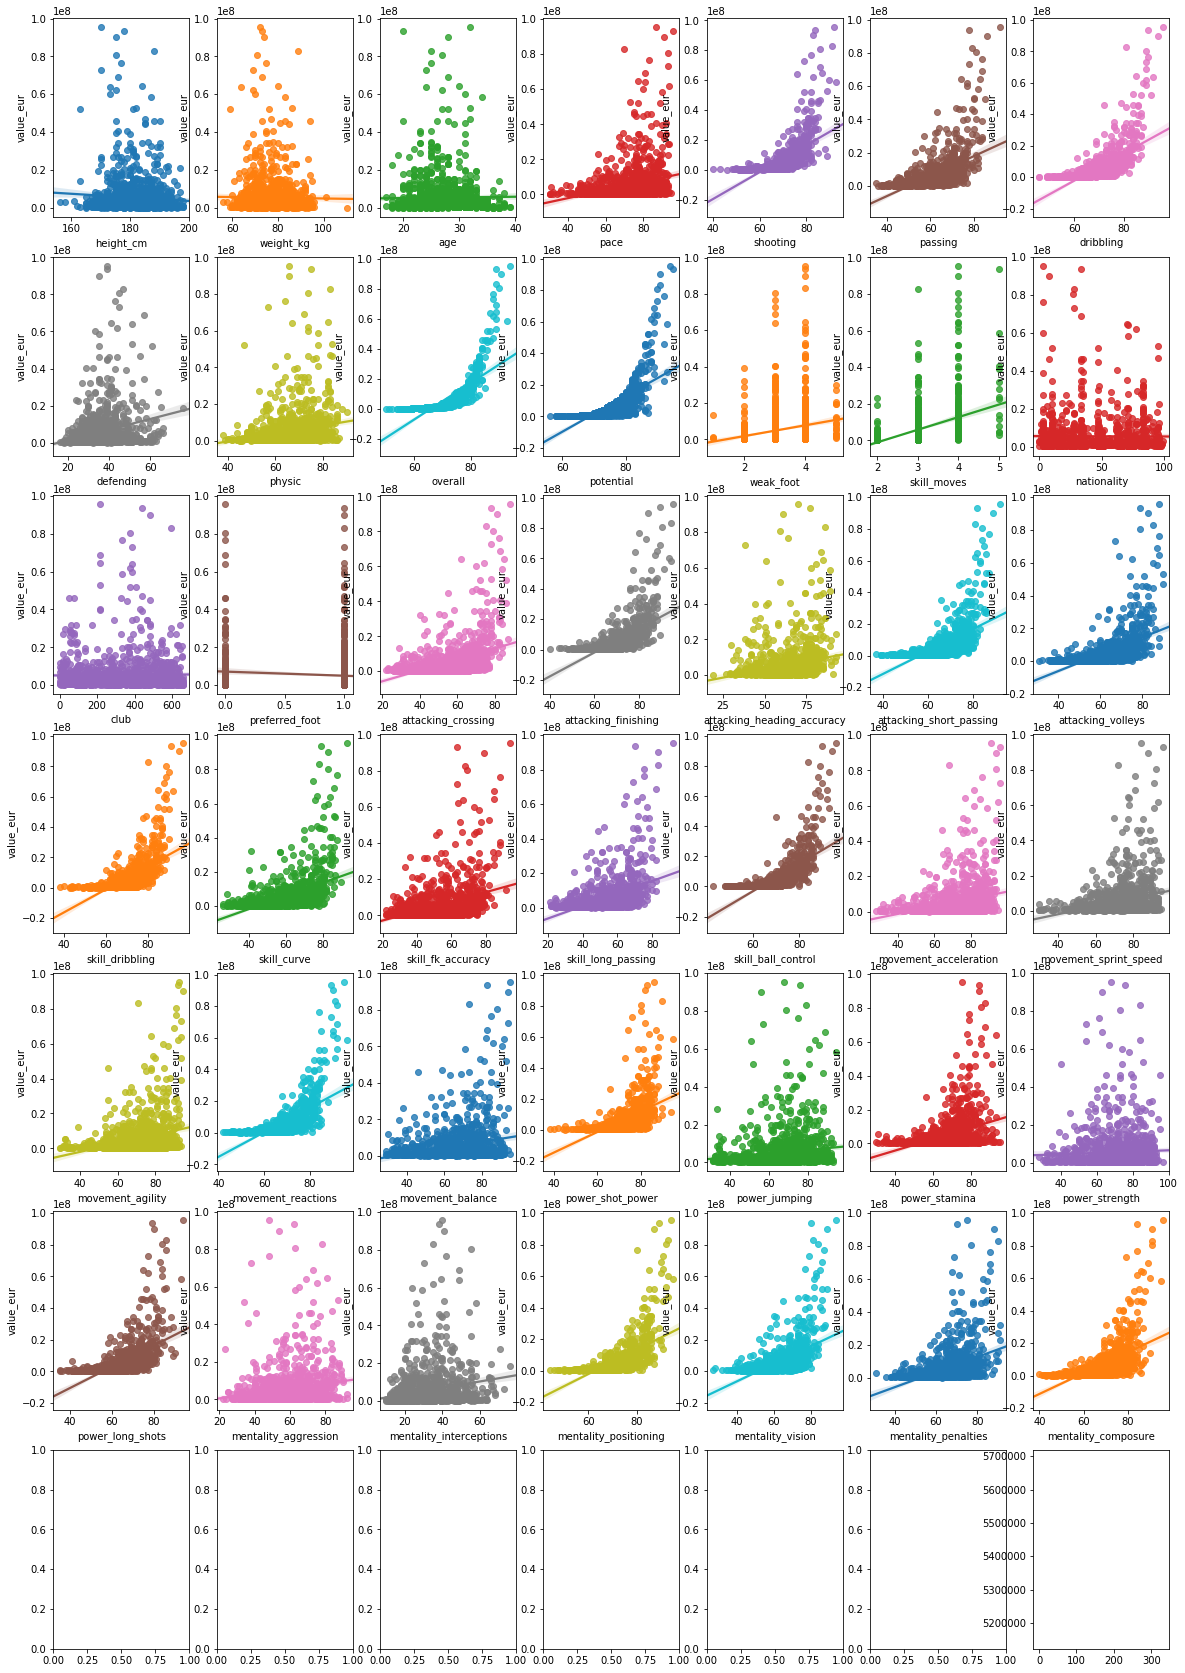

In [10]:
# 6개의 행과 7개의 열을 가진 subplots를 이용. axs는 6x7개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(20,30) , ncols=7 , nrows=7)
lm_features = ['height_cm','weight_kg','age','pace','shooting','passing','dribbling','defending','physic','overall','potential','weak_foot','skill_moves','nationality','club','preferred_foot','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure']
for i , feature in enumerate(lm_features):
    row = int(i/7)
    col = i%7
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='value_eur',data=fifaDF , ax=axs[row][col])

In [11]:
need_corr_features=['height_cm','weight_kg','age','pace','shooting','passing','dribbling','defending','physic','overall','potential','weak_foot','skill_moves','nationality','club','preferred_foot','attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','value_eur']

fifaDF_temp=pd.DataFrame(data=fifaDF[need_corr_features])
corr=fifaDF_temp.corr(method='pearson')
print(corr)

                            height_cm  weight_kg       age      pace  \
height_cm                    1.000000   0.748694  0.064831 -0.498876   
weight_kg                    0.748694   1.000000  0.181985 -0.485547   
age                          0.064831   0.181985  1.000000 -0.332860   
pace                        -0.498876  -0.485547 -0.332860  1.000000   
shooting                     0.077758   0.178383  0.353260  0.006317   
passing                     -0.319971  -0.238897  0.232061  0.275636   
dribbling                   -0.420663  -0.362611  0.058908  0.509783   
defending                   -0.072521  -0.044737  0.209035  0.032456   
physic                       0.559526   0.644756  0.327588 -0.264843   
overall                     -0.050456   0.028712  0.268566  0.211050   
potential                   -0.097513  -0.069474 -0.257745  0.317415   
weak_foot                   -0.066385  -0.023955  0.131147  0.074149   
skill_moves                 -0.301279  -0.267134  0.046418  0.37

In [12]:
#다중공선성 판별
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.api as sm;

## x와 y의 상관계수가 0.2이상인 것과 다중공선성이 10미만인 변수들을 선별했다.  

In [13]:
y, X = dmatrices('value_eur ~ international_reputation + physic + potential + skill_moves + attacking_crossing + attacking_finishing + attacking_heading_accuracy + attacking_short_passing + attacking_volleys + skill_dribbling + skill_curve + skill_fk_accuracy + skill_long_passing + skill_ball_control + movement_reactions + movement_acceleration + movement_sprint_speed + movement_agility + movement_balance + power_shot_power + power_stamina + power_long_shots + mentality_positioning + mentality_vision + mentality_penalties + mentality_composure + defending', fifaDF, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,302.605046,Intercept
1,1.677095,international_reputation
2,3.566775,physic
3,3.273376,potential
4,2.540150,skill_moves
5,3.562935,attacking_crossing
6,5.929671,attacking_finishing
7,3.490425,attacking_heading_accuracy
8,6.273905,attacking_short_passing
9,3.563727,attacking_volleys


## 몸값과 모든 변수와의 관계를 보고 rmsle(root mean square log error) 구하기

In [14]:
y_target=fifaDF['value_eur']
X_data=fifaDF.drop(['value_eur'],axis=1, inplace=False)
X_data=X_data.drop(['age'],axis=1, inplace=False)
X_data=X_data.drop(['height_cm'],axis=1, inplace=False)
X_data=X_data.drop(['weight_kg'],axis=1, inplace=False)
X_data=X_data.drop(['nationality'],axis=1, inplace=False)
X_data=X_data.drop(['club'],axis=1, inplace=False)
X_data=X_data.drop(['overall'],axis=1, inplace=False)
X_data=X_data.drop(['wage_eur'],axis=1, inplace=False)
X_data=X_data.drop(['preferred_foot'],axis=1, inplace=False)
X_data=X_data.drop(['weak_foot'],axis=1, inplace=False)
X_data=X_data.drop(['team_position'],axis=1, inplace=False)
X_data=X_data.drop(['shooting'],axis=1, inplace=False)
X_data=X_data.drop(['passing'],axis=1, inplace=False)
X_data=X_data.drop(['dribbling'],axis=1, inplace=False)
X_data=X_data.drop(['physic'],axis=1, inplace=False)
X_data=X_data.drop(['power_jumping'],axis=1, inplace=False)
X_data=X_data.drop(['power_strength'],axis=1, inplace=False)
X_data=X_data.drop(['mentality_aggression'],axis=1, inplace=False)

In [15]:
#드롭한 변수가 잘 드롭되었는지 확인. 
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 18148
Data columns (total 28 columns):
potential                     1223 non-null int64
international_reputation      1223 non-null int64
skill_moves                   1223 non-null int64
pace                          1223 non-null float64
defending                     1223 non-null float64
attacking_crossing            1223 non-null int64
attacking_finishing           1223 non-null int64
attacking_heading_accuracy    1223 non-null int64
attacking_short_passing       1223 non-null int64
attacking_volleys             1223 non-null int64
skill_dribbling               1223 non-null int64
skill_curve                   1223 non-null int64
skill_fk_accuracy             1223 non-null int64
skill_long_passing            1223 non-null int64
skill_ball_control            1223 non-null int64
movement_acceleration         1223 non-null int64
movement_sprint_speed         1223 non-null int64
movement_agility              1223 non

## y_target값이 개노답이니 로그변환 시켜줘야함.

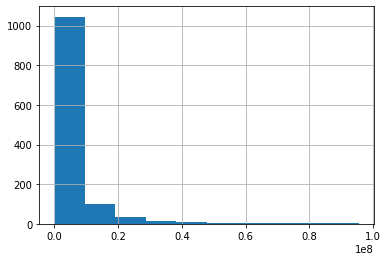

In [16]:
y_target.hist()

In [17]:
y_log_transform=np.log1p(y_target)

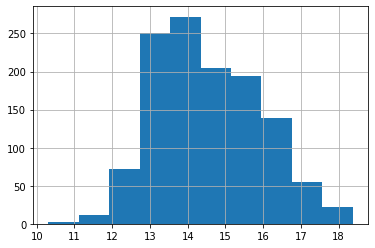

In [18]:
y_log_transform.hist()

## RMSLE 구하는 함수.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MSE 는 scikit learn의 mean_absolute_error() 로 계산
    mse_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MSE: {2:.3F}'.format(rmsle_val, rmse_val, mse_val))

# y_target값을 로그변환하고 지수화 하고 다시 로그변환 함수를 활용하여 테스트를 돌림. 

### linear regression으로 rmsle와 회귀 계수 구해보기.

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# 타겟 컬럼인 value_eur 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 0.345, RMSE: 8009669.735, MSE: 1416086.709


potential                     0.070721
skill_ball_control            0.028639
attacking_finishing           0.020732
mentality_positioning         0.019592
power_shot_power              0.018624
attacking_short_passing       0.016258
pace                          0.015819
skill_dribbling               0.013746
movement_reactions            0.010789
skill_moves                   0.007257
attacking_heading_accuracy    0.007075
power_stamina                 0.006822
power_long_shots              0.006764
attacking_volleys             0.001617
skill_fk_accuracy             0.001361
movement_acceleration         0.001092
mentality_interceptions       0.000453
skill_long_passing           -0.000149
mentality_vision             -0.000168
movement_agility             -0.000282
attacking_crossing           -0.000925
movement_sprint_speed        -0.001807
skill_curve                  -0.001886
defending                    -0.002017
mentality_composure          -0.002460
mentality_penalties      

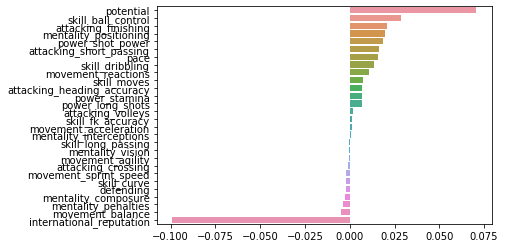

In [23]:
coef = pd.Series(lr_reg.coef_, index=X_data.columns)
coef_sort = coef.sort_values(ascending=False)
print(coef_sort)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

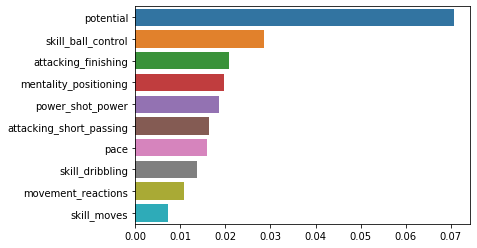

In [24]:
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [25]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 18148
Data columns (total 28 columns):
potential                     1223 non-null int64
international_reputation      1223 non-null int64
skill_moves                   1223 non-null int64
pace                          1223 non-null float64
defending                     1223 non-null float64
attacking_crossing            1223 non-null int64
attacking_finishing           1223 non-null int64
attacking_heading_accuracy    1223 non-null int64
attacking_short_passing       1223 non-null int64
attacking_volleys             1223 non-null int64
skill_dribbling               1223 non-null int64
skill_curve                   1223 non-null int64
skill_fk_accuracy             1223 non-null int64
skill_long_passing            1223 non-null int64
skill_ball_control            1223 non-null int64
movement_acceleration         1223 non-null int64
movement_sprint_speed         1223 non-null int64
movement_agility              1223 non

## --------여기까지 Linear Regression을 활용하여 RMSLE값과 회귀 계수 값을 알아보았다.--------

# 선형 회귀 모델 학습/예측/평가

In [26]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSLE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 타겟 컬럼인 value_eur 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target_log, test_size=0.3, random_state=0)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSLE: 0.345
Ridge 로그 변환된 RMSLE: 0.345
Lasso 로그 변환된 RMSLE: 0.397


[0.344587866603889, 0.34457010403657773, 0.3966040904240122]

In [28]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_data.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

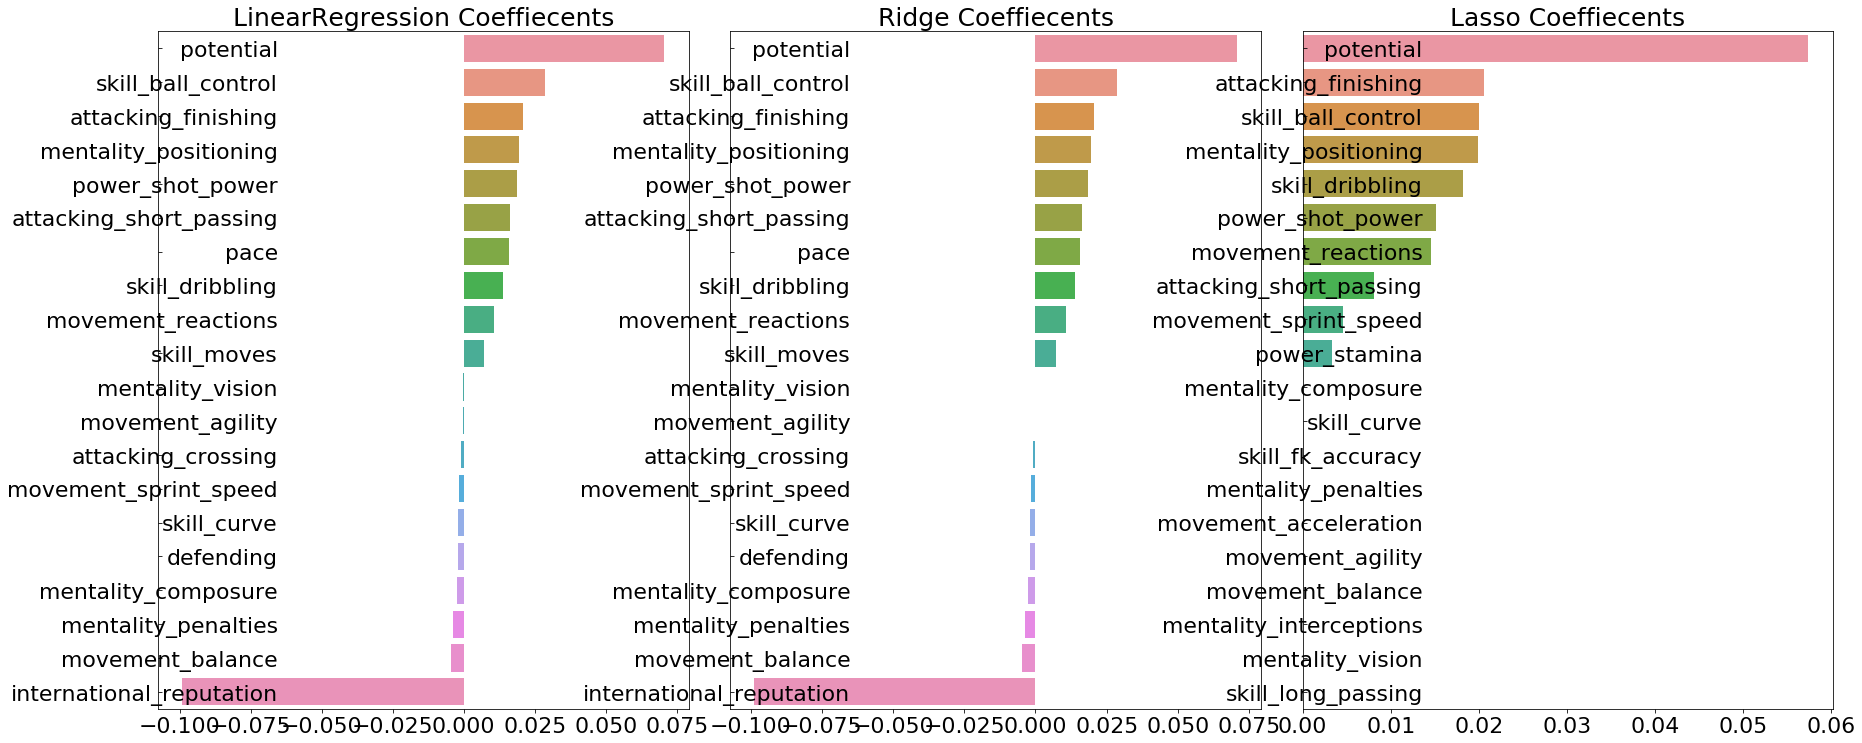

In [29]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [30]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_data, y_target_log,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSLE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSLE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSLE 값 리스트: [0.329 0.411 0.347 0.342 0.323]
LinearRegression CV 평균 RMSLE 값: 0.35

Ridge CV RMSLE 값 리스트: [0.329 0.411 0.347 0.342 0.323]
Ridge CV 평균 RMSLE 값: 0.35

Lasso CV RMSLE 값 리스트: [0.652 0.469 0.365 0.409 0.472]
Lasso CV 평균 RMSLE 값: 0.473


# 하이퍼 파라미터 튜닝

In [31]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_data, y_target_log)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.3515, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.3468, 최적 alpha:{'alpha': 0.05}


/Users/kimdongkyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


LinearRegression 로그 변환된 RMSLE: 0.345
Ridge 로그 변환된 RMSLE: 0.344
Lasso 로그 변환된 RMSLE: 0.344


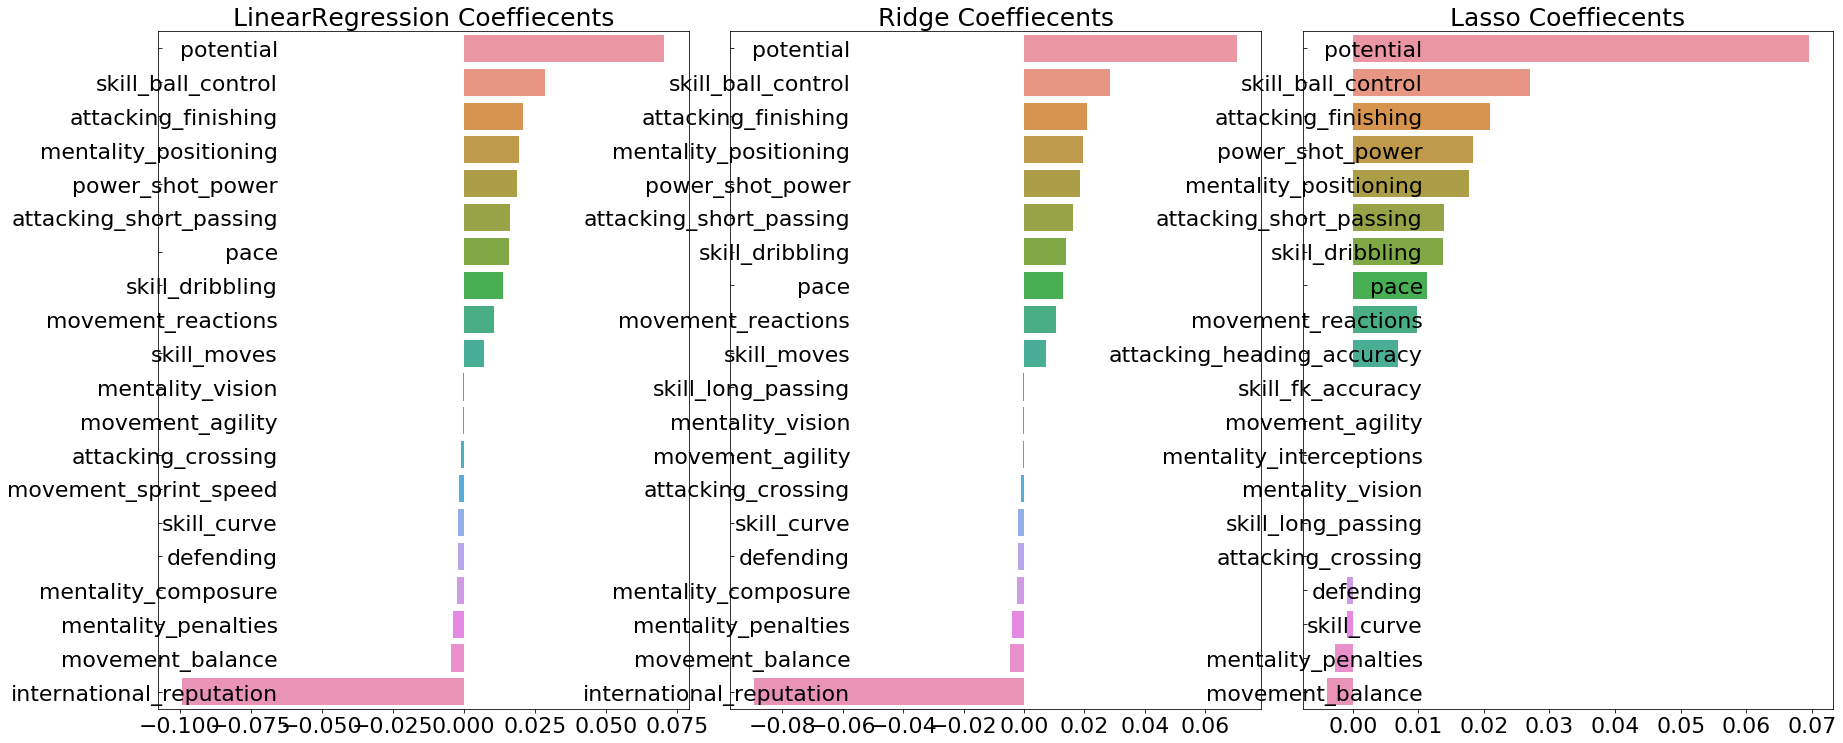

In [32]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [33]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = X_data.dtypes[X_data.dtypes != 'object'].index
# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = X_data[features_index].apply(lambda x : skew(x))
# skew 정도가 5 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

international_reputation    2.958299
dtype: float64


In [34]:
X_data[skew_features_top.index] = np.log1p(X_data[skew_features_top.index])

In [35]:
# Skew가 높은 피처들을 로그 변환 후 피처/타겟 데이터 셋 재생성

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target_log, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.3504, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.3468, 최적 alpha:{'alpha': 0.05}


/Users/kimdongkyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


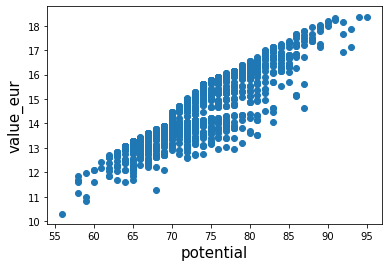

In [36]:
plt.scatter(x = X_data['potential'], y = y_target_log)
plt.ylabel('value_eur', fontsize=15)
plt.xlabel('potential', fontsize=15)
plt.show()

## ----------이상치 없다고 판단. 재학습 안함.------------

## 회귀 트리 모델 학습/예측/평가

In [37]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = get_best_params(xgb_reg, xgb_params)

[00:16:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:16:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:16:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:16:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:16:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/kimdongkyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[00:16:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.6194, 최적 alpha:{'n_estimators': 1000}


In [38]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = get_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.4747, 최적 alpha:{'n_estimators': 1000}


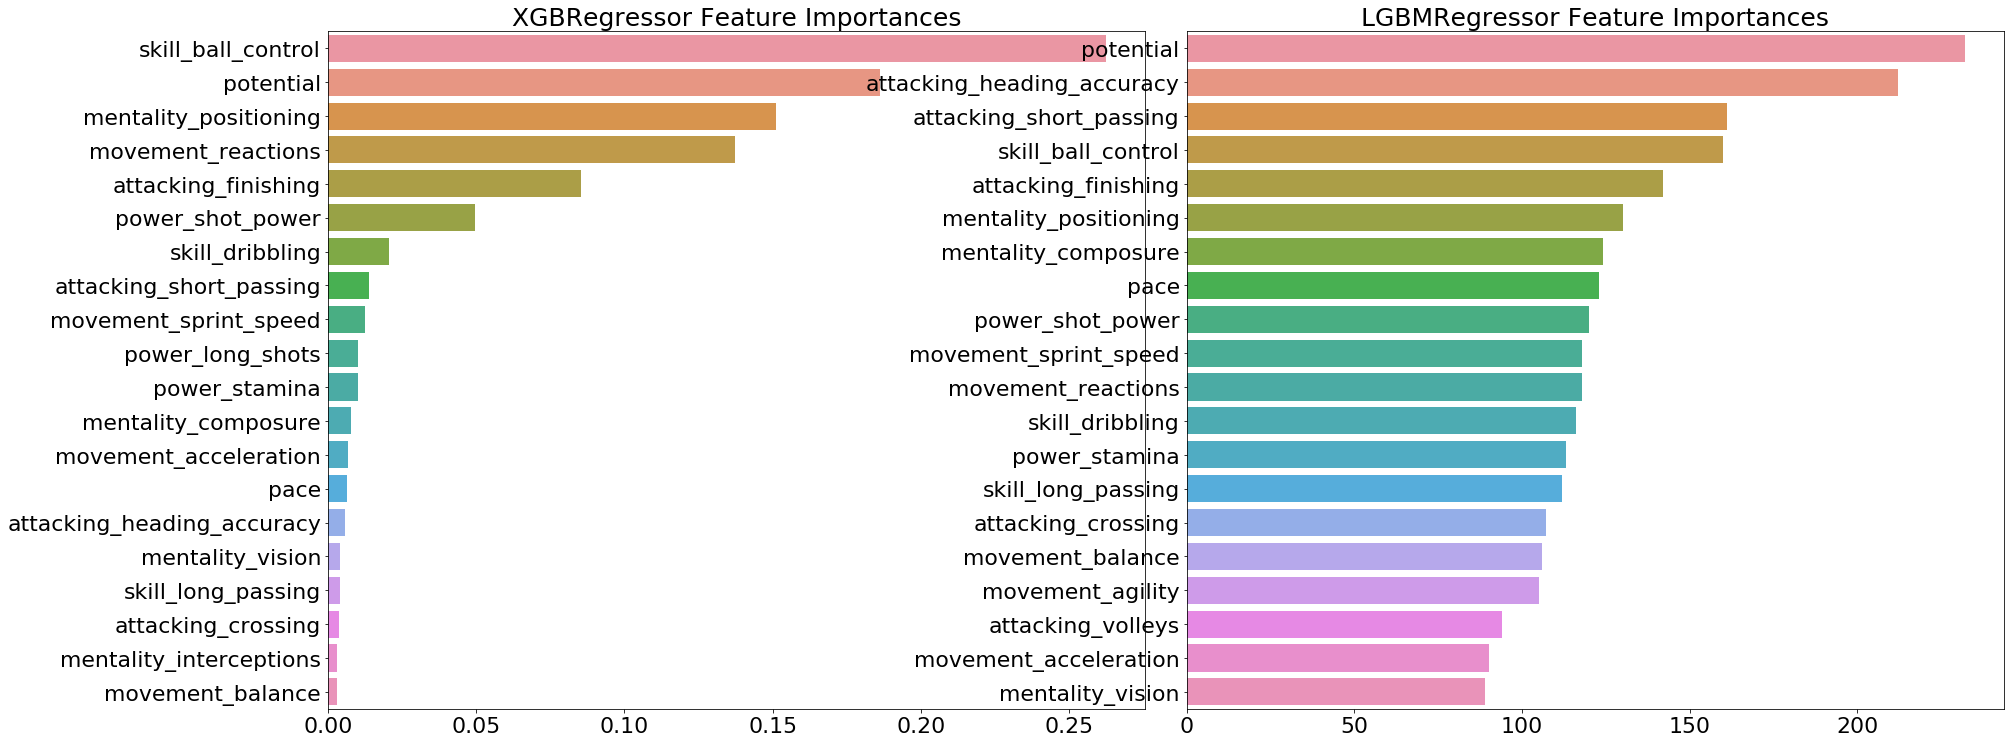

In [39]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_data.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 get_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

## 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [40]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSLE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSLE: 0.31382140150481524
Ridge 모델의 RMSLE: 0.31386426821270885
Lasso 모델의 RMSLE: 0.31379798323730385


In [41]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[00:17:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSLE: 0.2675261798595299
XGBM 모델의 RMSLE: 0.2768390815446319
LGBM 모델의 RMSLE: 0.2689035482617811


# 스태킹 앙상블 모델을 통한 회귀 예측

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [43]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[00:17:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[00:17:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[00:17:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[00:17:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[00:17:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시

In [59]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSLE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSLE 값은: 0.2542875935026318
